**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5
+ scipy 1.1.0
+ statsmodels 0.9.0

# Критерии Стьюдента

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [157]:
import scipy
import statsmodels
print(np.__version__)
print(pd.__version__)
print(scipy.__version__)
print(statsmodels.__version__)

1.20.1
1.2.4
1.6.2
0.12.2


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [158]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

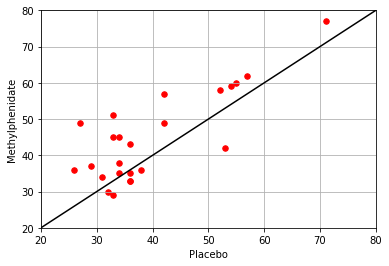

In [5]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

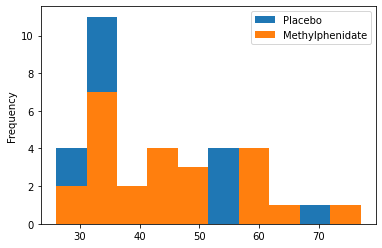

In [6]:
data.plot.hist()
pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [7]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

In [8]:
print("95%% confidence interval: [%f, %f]" % zconfint(data.Placebo))

95% confidence interval: [35.223273, 44.276727]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

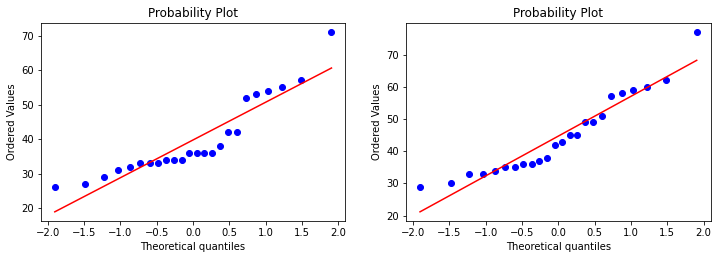

In [9]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [9]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020


In [11]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate))

Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

In [12]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.1532919977404709)

In [14]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-1.915927, 11.832593]


## Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

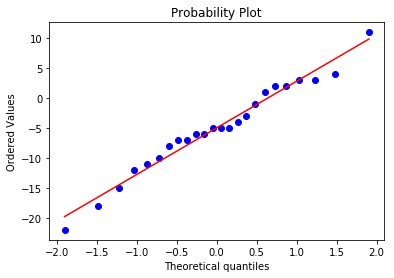

In [15]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [16]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo))

Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254


Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [17]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [18]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean())

95% confidence interval: [1.775236, 8.141431]


In [11]:
(9.57-9.5) / (0.4**2 / 160)**0.5

2.213594362117874

In [15]:
scipy.stats.norm.pdf(-2.213594362117874) *2

0.06885232036415302

In [17]:
2* scipy.stats.norm.cdf(-2.213594362117874)

0.026856695507523842

In [18]:
data = pd.read_csv('diamonds.txt', sep='\t')

In [19]:
data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'],
                                                    test_size=0.25, random_state=1)

In [107]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [134]:
forest = RandomForestRegressor(n_estimators=10, random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [135]:
lp = lin_reg.predict(X_test)
fp = forest.predict(X_test)

In [136]:
y_test-lp
y_test-fp

2714     -294.55
14653   -1291.60
52760     453.20
48658     -42.00
14812   -2375.50
          ...   
50310    -120.80
39735      81.20
2915    -1426.00
4960      298.70
42912     281.10
Name: price, Length: 13485, dtype: float64

In [137]:
abs(y_test-lp)

2714      214.422356
14653    1016.460537
52760      41.878717
48658       7.165645
14812    1113.152701
            ...     
50310     898.690921
39735      49.903573
2915     2171.491803
4960      103.828181
42912     159.325297
Name: price, Length: 13485, dtype: float64

In [138]:
abs(y_test-fp)

2714      294.55
14653    1291.60
52760     453.20
48658      42.00
14812    2375.50
          ...   
50310     120.80
39735      81.20
2915     1426.00
4960      298.70
42912     281.10
Name: price, Length: 13485, dtype: float64

In [139]:
stats.ttest_rel(abs(y_test-lp), abs(y_test-fp))

Ttest_relResult(statistic=13.017729783878186, pvalue=1.6551745751493726e-38)

In [140]:
stats.ttest_rel(lp, fp)

Ttest_relResult(statistic=-3.632074526088288, pvalue=0.00028219466484163)

In [141]:
stats.ttest_rel(y_test-lp, y_test-fp)

Ttest_relResult(statistic=3.632074526088288, pvalue=0.00028219466484163)

In [142]:
mean_squared_error(y_test, lp)

2140750.1376284985

In [143]:
mean_squared_error(y_test, fp)

1974973.2160511552

In [144]:
mean_absolute_error(y_test, lp)

890.3764004285579

In [145]:
mean_absolute_error(y_test, fp)

802.9205172724115

In [150]:
DescrStatsW(abs(y_test-lp) - abs(y_test-fp)).tconfint_mean()

(74.28724532595211, 100.62452098634071)

In [147]:
DescrStatsW((lp) - (fp)).tconfint_mean()

(-44.25255799512273, -13.23042653712017)

In [74]:
mean(abs(y_test-fp))

815.0519027507515

In [71]:
(y_test-fp)

5656      -58.536115
36814     273.543853
12904    -716.467731
30175    -185.331993
30570      25.114852
45797    -228.586179
2402      669.535358
6976      211.463885
7235      254.463885
19644   -1816.625442
47880      81.546605
823      1031.175511
14170    -154.128436
50587    -596.117304
11805    -904.513918
20674    3350.285228
12651   -1594.743675
47911      81.521227
17027    1192.285228
20526   -1757.742887
48175    -768.957326
18999   -2659.572191
34658     163.114852
23669    4573.989282
37130     166.787911
50310    -268.464642
39735     185.668007
2915    -2519.950113
4960     -205.536115
42912     385.554099
Name: price, dtype: float64

In [156]:
scipy.stats.norm.cdf(-(541.4 - 525) / (100/100**0.5))

0.05050258347410395

In [155]:
scipy.stats.norm.cdf(-(541.5 - 525) / (100/100**0.5))

0.0494714680336481